# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import re
import string

## Load and display the data

In [4]:
#your code here
vec_df = pd.read_csv('Tweets.csv')
ground_df = pd.read_csv('ground_truth.csv')

#Displaying Tweets
vec_df

,created_at,id,id_str,text,truncated,entities,metadata,source,is_quote_status,retweet_count,...,lang,user_name,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_created_at,user_favourites_count,user_verified,user_statuses_count
0,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @EdwardTHardy: The 7th US Circuit Court of ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,113,...,en,Sherry Wahl,queenfancygirl,153,264,7,Thu Mar 18 19:16:31 +0000 2010,32984,False,31308
1,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,RT @VenomMovie: The world has enough superhero...,False,"{'hashtags': [{'text': 'Venom', 'indices': [64...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5902,...,en,Kay Khairil ðŸŒ,ikaykhairil,780,382,12,Wed Mar 17 03:27:51 +0000 2010,6648,False,87272
2,Tue Jul 31 13:34:40 +0000 2018,1.024290e+18,1.024290e+18,RT @FutbolBible: Teachers vs Students match &a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,3745,...,en,Charlie Hamilton,ch100897,255,246,1,Sun Mar 03 09:23:03 +0000 2013,5426,False,1731
3,Tue Jul 31 13:34:27 +0000 2018,1.024290e+18,1.024290e+18,RT @mashable: Someone from 'The Office' actual...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,10,...,en,Mike Santos,mikesantosx71,2419,2428,4,Thu May 25 14:37:29 +0000 2017,5993,False,2153
4,Tue Jul 31 13:34:28 +0000 2018,1.024290e+18,1.024290e+18,RT @_missj0hnson: Iâ€™m at Starbucks asking fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,25306,...,en,Soots,DaAverageDingus,314,722,7,Tue Mar 15 01:14:02 +0000 2011,6285,False,33503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,Tue Jul 31 13:34:36 +0000 2018,1.024290e+18,1.024290e+18,RT @AnnieOakley2015: @AVoiceForAllGA Following...,False,"{'hashtags': [{'text': 'GA10', 'indices': [93,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5,...,en,TrumpNeck,Francis_3,802,1353,7,Thu May 28 12:02:54 +0000 2009,79149,False,6491
11095,Tue Jul 31 13:34:15 +0000 2018,1.024290e+18,1.024290e+18,RT @BillOReilly: What exactly is Donald Trump ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,8393,...,en,atm,allen_mcdowell,429,599,12,Wed Oct 10 11:37:34 +0000 2012,2029,False,5065
11096,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,"Paradoxically, your good intentions may stand ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.twittascope.com"" rel=""nofo...",False,0,...,en,Jan15î„… .,yellow_naeeeee,135,94,0,Mon Sep 23 22:37:49 +0000 2013,90,False,4265
11097,Tue Jul 31 13:34:35 +0000 2018,1.024290e+18,1.024290e+18,RT @enblocibc: Less than 4 days to go for the ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,18,...,en,âœ¨MC Capital Venturesâœ¨,MCCapitalV,505,243,8,Thu Feb 01 23:58:16 +0000 2018,15829,False,13604


In [23]:
#Displaying Ground Truth Data
ground_df

,0.000000000000000000e+00
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
11093,0.0
11094,1.0
11095,0.0
11096,0.0


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [5]:
# your code here
vec_df.head(2)
vec_df.metadata



0        {'iso_language_code': 'en', 'result_type': 're...
1        {'iso_language_code': 'en', 'result_type': 're...
2        {'iso_language_code': 'en', 'result_type': 're...
3        {'iso_language_code': 'en', 'result_type': 're...
4        {'iso_language_code': 'en', 'result_type': 're...
                               ...                        
11094    {'iso_language_code': 'en', 'result_type': 're...
11095    {'iso_language_code': 'en', 'result_type': 're...
11096    {'iso_language_code': 'en', 'result_type': 're...
11097    {'iso_language_code': 'en', 'result_type': 're...
11098    {'iso_language_code': 'en', 'result_type': 're...
Name: metadata, Length: 11099, dtype: object

## Part-1
*Vectorize tweets using only meta data*

In [6]:
def get_features(df, start_row, end_row, features):
    """
    Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
    Input parameters to this function are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
    """

    # your code here
    metadata = df.loc[start_row:end_row,features]
    return metadata

get_features(vec_df,1,11098,['user_name','user_screen_name','user_followers_count','user_friends_count','user_listed_count','user_favourites_count','user_statuses_count'])


,user_name,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_statuses_count
1,Kay Khairil ðŸŒ,ikaykhairil,780,382,12,6648,87272
2,Charlie Hamilton,ch100897,255,246,1,5426,1731
3,Mike Santos,mikesantosx71,2419,2428,4,5993,2153
4,Soots,DaAverageDingus,314,722,7,6285,33503
5,tan god jongin,artychubs,577,251,6,6136,11902
...,...,...,...,...,...,...,...
11094,TrumpNeck,Francis_3,802,1353,7,79149,6491
11095,atm,allen_mcdowell,429,599,12,2029,5065
11096,Jan15î„… .,yellow_naeeeee,135,94,0,90,4265
11097,âœ¨MC Capital Venturesâœ¨,MCCapitalV,505,243,8,15829,13604


Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

Accuracy of KNN with k = 20 is:  0.9540540540540541


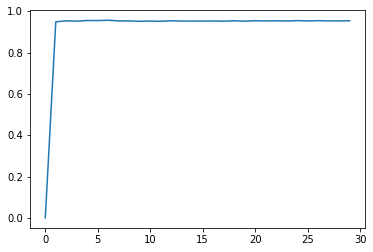

In [11]:
# your code here

features = ['retweet_count','user_followers_count','user_friends_count','user_listed_count','user_favourites_count','user_statuses_count']
metadata = get_features(vec_df,1,11099,features)
NormArr = MinMaxScaler().fit_transform(metadata)
xvals = NormArr
yvals = np.array(ground_df, dtype = 'int')
x_train, x_test, y_train, y_test = train_test_split(xvals, yvals, test_size=0.3)

def KNN_getaccuracy(x_train, y_train, x_test, y_test, k):
    
    error = 0
    
    Neigbour_Set = NearestNeighbors(n_neighbors=k).fit(x_train)
    dists, indices = Neigbour_Set.kneighbors(x_test)
    for i in range(y_test.shape[0]):
        if np.count_nonzero(y_train[indices[i]]) > k/2:
            if y_test[i] == 0:
                error += 1
            else:
                continue
        else:
            if y_test[i] == 1:
                error += 1
            else:
                continue
            
    accuracy = (1 - error/x_test.shape[0])
    return accuracy

x_axis = np.zeros(30)
acc_array = np.zeros(30)
for i in range(1,30):
    x_axis[i] = i
    acc_array[i] = KNN_getaccuracy(x_train, y_train, x_test, y_test, i)

plt.plot(x_axis, acc_array)
     


print("Accuracy of KNN with k = 20 is: ", KNN_getaccuracy(x_train, y_train, x_test, y_test, 20))


## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [25]:
def tweet_vectoriser(tweets):
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
  text = np.array(tweets['text'])
  raw=[]
  for tweet in text :
    raw.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())) 
  vectorizer = TfidfVectorizer(stop_words='english')
  vectorizer.fit(raw)
  tfidf_vector= vectorizer.transform(raw)
  decomp = TruncatedSVD(n_components=25)
  decomp.fit(tfidf_vector)
  ret = decomp.transform(tfidf_vector)
  return ret
  
tweet_matrix = tweet_vectoriser(vec_df)
tweet_matrix = np.delete(tweet_matrix, 0, 0)

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

(11098, 50)
Accuracy of KNN with k = 50 is:  0.9216216216216216


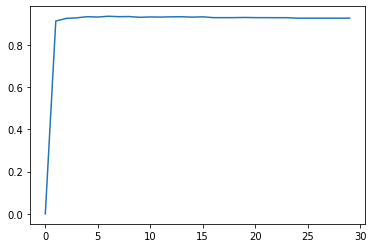

In [24]:
# your code here
print(tweet_matrix.shape)

NormArr = MinMaxScaler().fit_transform(tweet_matrix)
xvals = NormArr
yvals = np.array(ground_df, dtype = 'int')
x_train, x_test, y_train, y_test = train_test_split(xvals, yvals, test_size=0.3)

x_axis = np.zeros(30)
acc_array = np.zeros(30)
for i in range(1,30):
    x_axis[i] = i
    acc_array[i] = KNN_getaccuracy(x_train, y_train, x_test, y_test, i)

plt.plot(x_axis, acc_array)
     


print("Accuracy of KNN with k = 50 is: ", KNN_getaccuracy(x_train, y_train, x_test, y_test, 50))

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [23]:
# your code here
tweet_matrix = np.concatenate((tweet_matrix, NormArr), axis=1)

Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

Accuracy of KNN with k = 50 is:  0.9240240240240241


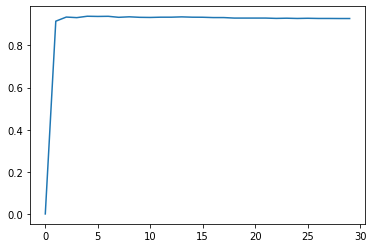

In [27]:
# your code here

NormArr = MinMaxScaler().fit_transform(tweet_matrix)
xvals = NormArr
yvals = np.array(ground_df, dtype = 'int')
x_train, x_test, y_train, y_test = train_test_split(xvals, yvals, test_size=0.3)

x_axis = np.zeros(30)
acc_array = np.zeros(30)
for i in range(1,30):
    x_axis[i] = i
    acc_array[i] = KNN_getaccuracy(x_train, y_train, x_test, y_test, i)

plt.plot(x_axis, acc_array)
print("Accuracy of KNN with k = 50 is: ", KNN_getaccuracy(x_train, y_train, x_test, y_test, 50))

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.